<a id="1"></a>
<h3 style='border:0; color:Crimson'>HOMEWORK 2</h3>

<ul>
<li>Student name: Mohammed Obidou</li>
<li>Student_id: 119200016</li>
<li>Student email: Mohammed.obidou@bilgiedu.tr</li>
</ul>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:crimson; border:0' role="tab" aria-controls="home"><center>Navigation</center></h3>

* [**Q1-A Spotify Analysis 🖥️**](#100)
  
* [**Q1-B Data Preprocessing 🧹**](#200)

* [**Q1-C Data Visualization 📊**](#300)

* [**Q2-A Choosing a model type 📋**](#400)

* [**Q3 Training different Models 🤖**](#400)
  
* [**Q4 Ensemble Learning 🧠**](#500)

![Spotify](https://wallpaperaccess.com/full/667773.jpg)

Imports

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import random
import numpy as np
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.feature_selection import *
from sklearn.ensemble import *
import xgboost as xgb
from sklearn.tree import *
from sklearn.svm import SVR
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

<a id=100></a>
<h4 style= 'Background:deeppink; color:white; border:0'><center>Q1-A Spotify Analysis 🖥️</center></h3>

In [17]:
spotify = pd.read_csv('data.csv')
spotify

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


well we don't have a ton of data infact the data is too small imo for any model to be 
dependable or accurate regardless of the accuracy

---

* Get the statistics of the dataset
* what we really care about is count, mean, std and min

In [18]:
spotify.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [19]:
spotify.transpose()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
danceability,0.803000,0.7620,0.2610,0.722000,0.7870,0.7780,0.666,0.92200,0.79400,0.853,...,0.583000,0.5330,0.8640,0.856,0.225000,0.1660,0.862000,0.499000,0.574000,0.747
energy,0.624000,0.7030,0.0149,0.736000,0.5720,0.6320,0.589,0.71200,0.65900,0.668,...,0.381000,0.5930,0.6290,0.602,0.980000,0.0551,0.624000,0.351000,0.729000,0.666
key,7.000000,10.0000,1.0000,3.000000,1.0000,8.0000,0.000,7.00000,7.00000,3.000,...,9.000000,11.0000,1.0000,0.000,6.000000,9.0000,3.000000,9.000000,10.000000,11.000
loudness,-6.764000,-7.9510,-27.5280,-6.994000,-7.5160,-6.4150,-8.405,-6.02400,-7.06300,-6.995,...,-10.033000,-5.2840,-6.6020,-8.173,-5.626000,-19.4940,-11.630000,-11.509000,-5.838000,-7.845
mode,0.000000,0.0000,1.0000,0.000000,1.0000,1.0000,0.000,1.00000,0.00000,1.000,...,0.000000,1.0000,0.0000,0.000,1.000000,0.0000,1.000000,0.000000,0.000000,1.000
speechiness,0.047700,0.3060,0.0419,0.058500,0.2220,0.1250,0.324,0.17100,0.04980,0.447,...,0.042900,0.0581,0.2790,0.336,0.143000,0.0520,0.056500,0.044800,0.096500,0.197
acousticness,0.451000,0.2060,0.9920,0.431000,0.1450,0.0404,0.555,0.07790,0.14300,0.263,...,0.416000,0.1560,0.0987,0.127,0.000006,0.9760,0.019200,0.951000,0.040600,0.130
instrumentalness,0.000734,0.0000,0.8970,0.000001,0.0000,0.0000,0.000,0.00004,0.00224,0.000,...,0.000226,0.0262,0.0000,0.000,0.860000,0.6350,0.000153,0.000099,0.000004,0.000
liveness,0.100000,0.0912,0.1020,0.123000,0.0753,0.0912,0.114,0.17500,0.09440,0.104,...,0.095800,0.0819,0.0737,0.115,0.065300,0.1190,0.046500,0.118000,0.194000,0.360
valence,0.628000,0.5190,0.0382,0.582000,0.6470,0.8270,0.776,0.90400,0.30800,0.745,...,0.153000,0.0888,0.2200,0.723,0.105000,0.1430,0.882000,0.616000,0.413000,0.531


let's have a look at the columns

In [20]:
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

we've 14 features having too many features isn't always a good thing, so we should
probably use feature engineering methods to decide which features to use

In [21]:
spotify.count()

danceability        195
energy              195
key                 195
loudness            195
mode                195
speechiness         195
acousticness        195
instrumentalness    195
liveness            195
valence             195
tempo               195
duration_ms         195
time_signature      195
liked               195
dtype: int64

so we've 195 songs. the description of the dataset the owner mentioned that his into
metal and other similar type of songs, and that most of his songs are metal so loudness
is probably a feature to include

In [22]:
len(spotify.columns)

14

<a id=200></a>
<h4 style= 'Background:deeppink; color:white; border:0'><center>Q1-B Data preprocessing 🧹</center></h3>

> ### Data preprocessing
> * **Data Cleaning**: handling missing values, dealing with noisy or inconsistent data.
>
> * **Data Transformation**: This involves transforming the data to make it suitable for analysis or modeling. Examples include converting categorical data to numerical data, scaling the data, and normalizing the data.
>
> * **Data Reduction**: reducing the size of the dataset while preserving its important features. Examples include feature selection, feature extraction, and dimensionality reduction.

### Null values

In [23]:
spotify.isnull()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
spotify.isnull().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
liked               False
dtype: bool

In [25]:
spotify.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

Well it seem we don't have any null values! 😊

---

let's check if we've duplicates

In [26]:
print(spotify[spotify.duplicated()])

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, liked]
Index: []


In [27]:
spotify.duplicated().sum()

0

well this seems to be an easy/boring dataset

---

Let's check for outliers

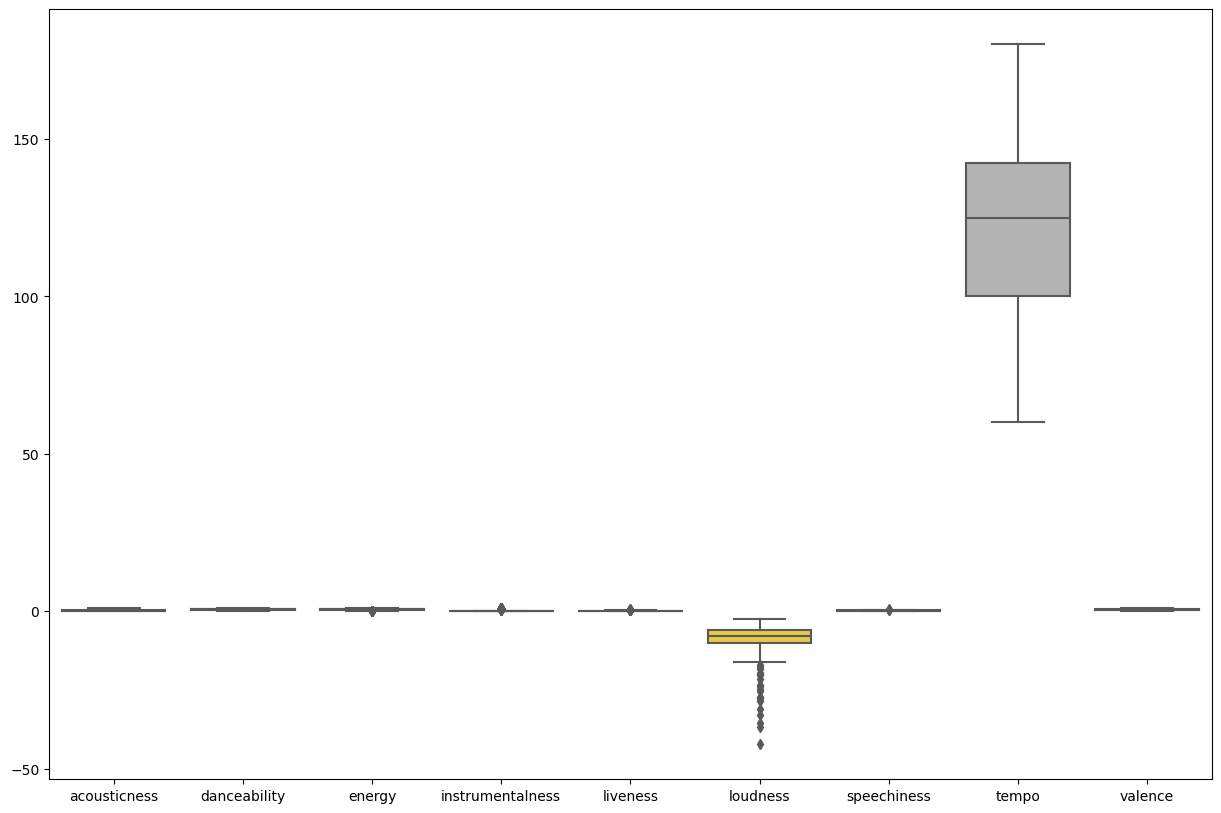

In [28]:
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
box = sns.boxplot(data=spotify[cols], palette=("Set2"))
plt.rcParams['figure.figsize']=(15,12)

> * Since we've no duplicated there's no need to drop any
> 
> * Keep in mind that we also have no null values so we don't have to drop any
> 
> * We also don't have any categorical "string" values so we don't need one hot   
> encoding or label encoding
>
> * outliers aren't always removed one should understand first the feature some
> non-continuous values in features shouldn't be removed it's not a mistake 
> like in this case some music are just louder than others

---

> ### Normalization
>  ensures that all the features have equal weightage and the model does not give 
> more preference to any one feature. two popular normalization techniques are 
> MinMaxScaler and StandardScaler:
>
> * MinMaxScaler scales the data to a range between 0 and 1, where the minimum value 
> of the feature is mapped to 0, and the maximum value is mapped to 1. This scaling 
> technique is suitable for cases where the data distribution is uniform.
>
> * StandardScaler scales the data to have a mean of 0 and standard deviation of 1. 
> It is suitable for cases where the data distribution is Gaussian or close to 
> Gaussian. StandardScaler subtracts the mean of the feature and divides by its 
> standard deviation, thereby transforming the feature to have zero mean and unit 
> variance.
> * we will apply minMax later


In [29]:
spotify.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.5550,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.0779,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.1430,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.2630,0.000000,0.1040,0.7450,157.995,165363,4,1


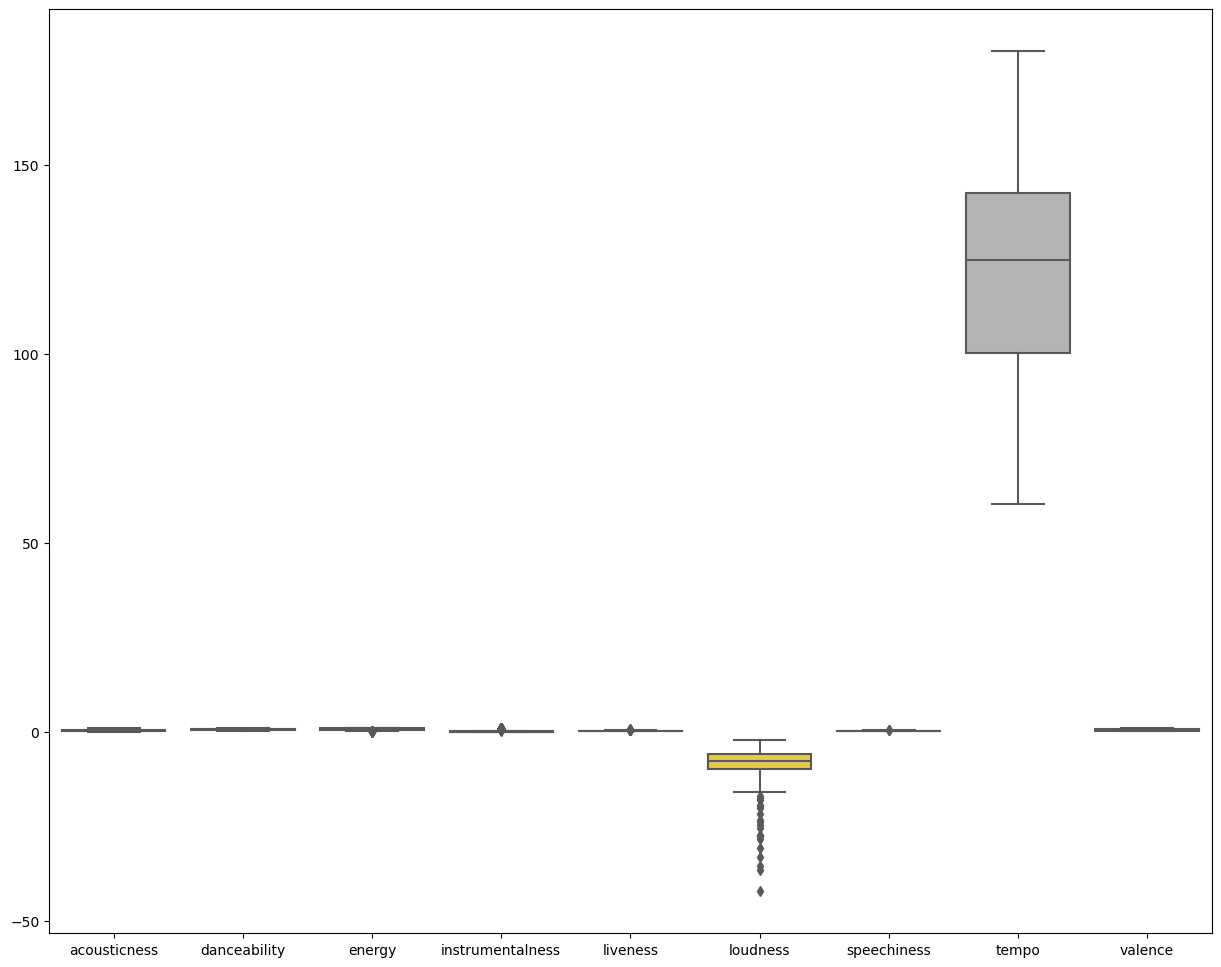

In [30]:
box = sns.boxplot(data=spotify[cols], palette=("Set2"))
plt.rcParams['figure.figsize']=(15,10)

<a id=300></a>
<h4 style= 'Background:deeppink; color:white; border:0'><center>Q1-C Visualization 📊</center></h3>

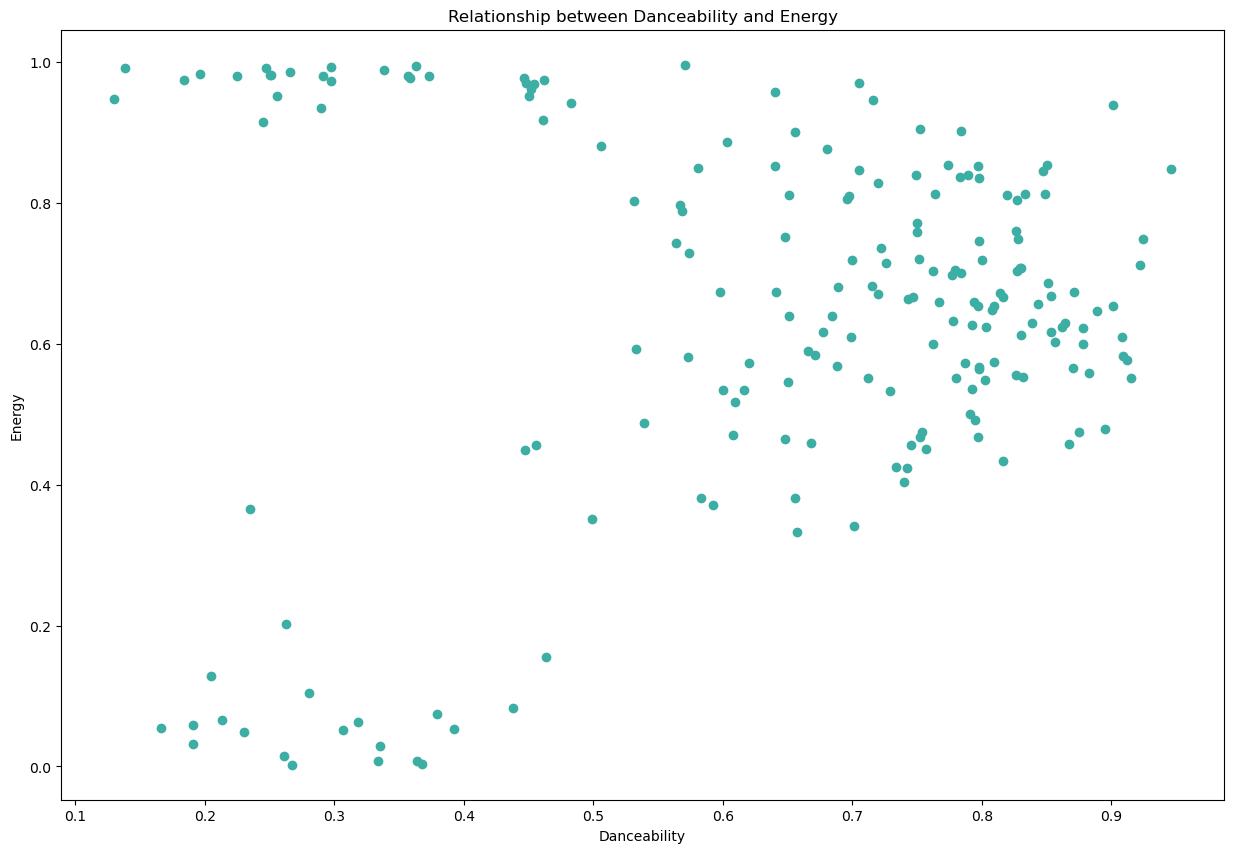

In [31]:
# Create a scatter plot of danceability vs. energy
plt.scatter(spotify['danceability'], spotify['energy'], color='#3CAEA3')

# Add labels and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Relationship between Danceability and Energy')
plt.rcParams["figure.figsize"] = (20,3)
# Display the chart
plt.show()


the closer to x=y the higher the relation, we can see that it's pretty scattered
but the majority is still higher danceability to higher energy. more linear correlation

In [32]:
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

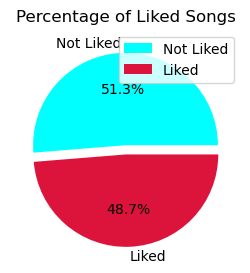

In [33]:
liked_counts = spotify['liked'].value_counts()
plt.pie(liked_counts, labels=['Not Liked', 'Liked'], explode=(0, 0.1), autopct='%1.1f%%', colors=['cyan','crimson'])
plt.title('Percentage of Liked Songs')
plt.rcParams["figure.figsize"] = (8,6)
plt.legend()
plt.show()

* there's more unliked songs in the dataset 51.3%
* less liked songs 48.7% 
* I guess the majority of people don't fancy metal that much

In [34]:
# get the values, liked songs are 1 filter it based on that
# loud songs are above 0.5 filtered based on that
liked_loud = spotify[ (spotify['liked']==1) + (spotify['loudness']>0.5)]
not_liked_loud = spotify[ (spotify['liked']==0) +(spotify['loudness']>0.5)]
like_not_loud = spotify[ (spotify['liked']==1) +(spotify['loudness']<0.5)]
not_liked_not_loud = spotify[ (spotify['liked']==1) + (spotify['loudness']<0.5)]

#prepare the the values for visualization
values1 = [len(liked_loud)+len(like_not_loud), len(not_liked_loud)+len(not_liked_not_loud)]
values2 = [len(liked_loud), len(not_liked_loud), len(like_not_loud), len(not_liked_not_loud)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Liked', 'Not Liked'], values=values1, name="Percentage of liked songs"),
              1, 1)
fig.add_trace(go.Pie(labels=['Liked-loud','liked-not loud', 'unliked-loud', 'unlike-not loud'], values=values2, name="Loudness and liked relation"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text=f"liked songs ditribution {' '*28}\
                Loudness and liked relation",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Liked songs', x=0.20, y=0.5, font_size=8, showarrow=False),
                 dict(text='liked vs loud', x=0.81, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

- more unliked songs based on loudness: 51.1%
- less liked songs based on loudness: 48.9%
- Surprisingly the more quiet songs are more liked, maybe it's the soft metal
- the unliked songs are pretty even for both loud and quiet songs at: 18.7%

In [35]:
spotify.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0


In [36]:
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

In [37]:
fig = px.violin(spotify, y="danceability", x="liked", color="mode", box=True, points="all", hover_data=spotify.columns, color_discrete_sequence=['cyan', 'deeppink'])
fig.update_layout(title_text="danceability and likeness on mode")
fig.show()

<center>Violin plot of danceability and likeness on mode</center>

* Mode 0: representing minor in cyan
* Mode 1: representing major in purple
* in the not liked: both minor and major are very similar in terms of danceability
* in the liked: both minor and major are very similar in terms of danceability again
* this is to be expected though since songs are a matter of taste and someone may
  or may not like a song regardless of it's danceability 
* this shows that the listener is interested in both danceable songs and non-danceable songs
* However it seems that danceability 0.8 is his/her most preferred option

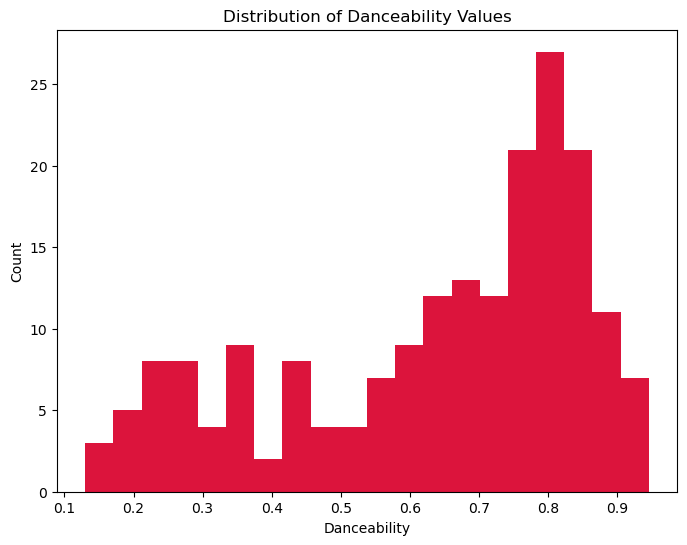

In [38]:
# Create a histogram of danceability values
plt.hist(spotify['danceability'], bins=20, color='crimson')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Distribution of Danceability Values')
plt.show()

<center>Distribution of histogram count</center>

 the majority of songs have about danceability of 0.7 score

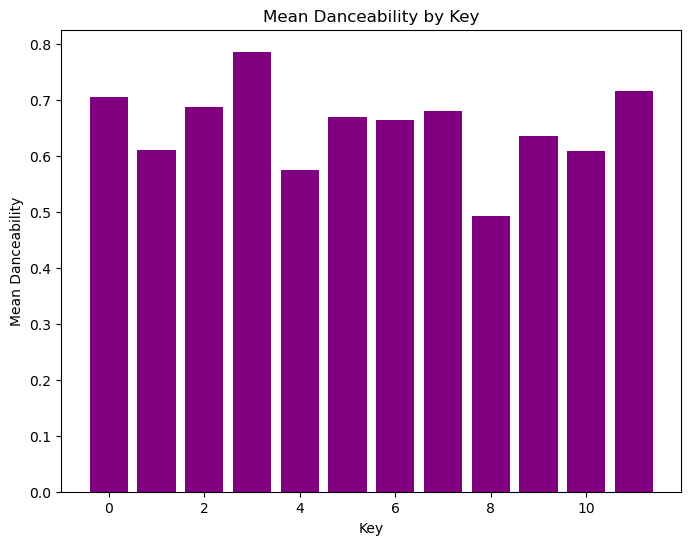

In [39]:
# Compute the mean danceability for each key
mean_danceability_by_key = spotify.groupby('key')['danceability'].mean()

# Create a bar plot of mean danceability by key
plt.bar(mean_danceability_by_key.index, mean_danceability_by_key.values, color='purple')
plt.xlabel('Key')
plt.ylabel('Mean Danceability')
plt.title('Mean Danceability by Key')
plt.show()


key 3 has the highest danceability of approximately 0.78!

<AxesSubplot:>

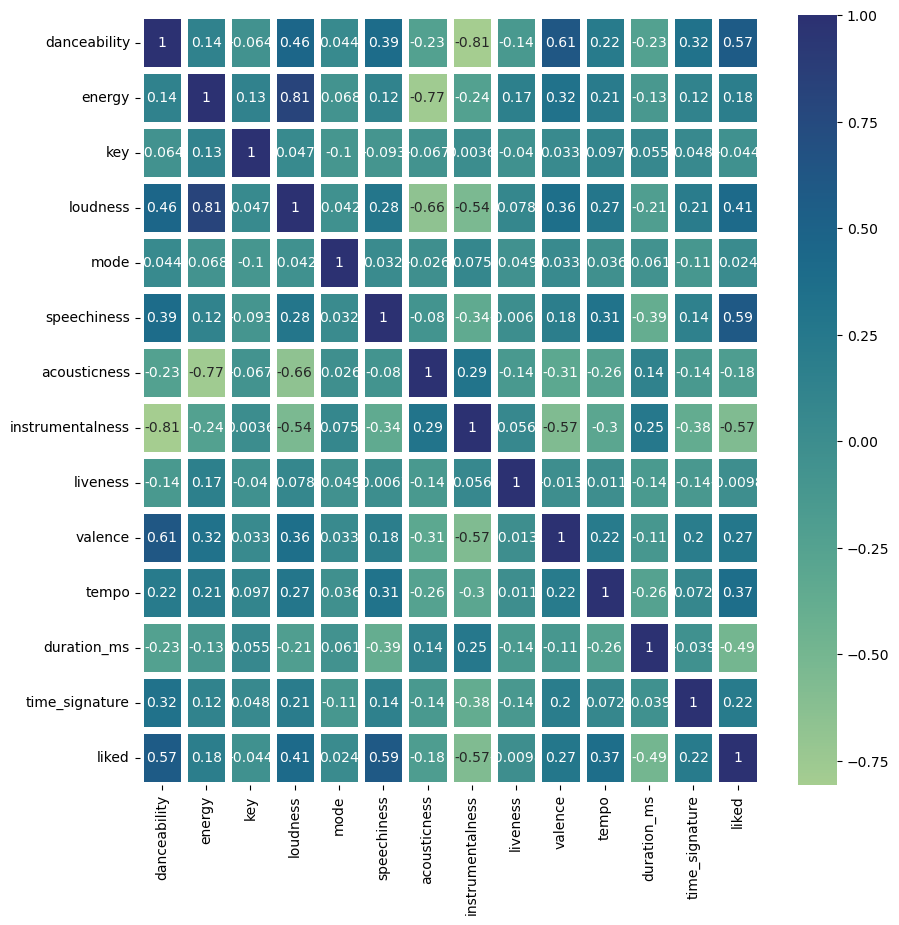

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(spotify.corr(), annot=True, cmap='crest', linewidth=5)

<center>Correlation map (heat map)</center>

* danceability, loudness and speachness has the highest correlation to liked
* danceability has high correlation with loudness and valance
* loudness has exceptionally high correlation with keys

---

<center>Feature selection</center>

* **Feature selection:** Is a method of reducing the input variables when when developing a model 
* less is more. is what comes to mind when using feature selection, reducing the number of input variable
  can reduce the computational cost and sometimes improve the accuracy of the model
* although this process is **not** done blindly, one method is to look at the significant/meaningful correlation
  between the feature and target for example if we had **index** feature it has no significant importance to target 
  Liked 

> The filter methods are as follows:
> * removing features with low variance A.K.A variance threshold
> * Kbest models for classification
> * Information gain

**Advantages**
* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* improve data's compatibility with a learning model class,
* encode inherent symmetries present in the input space.

[Source](https://www.kaggle.com/code/kaanboke/feature-selection-the-most-common-methods-to-know)

---

<center>Extra tree feature selection</center>

* Extra Trees (or Extremely Randomized Trees) is a tree-based feature selection algorithm that randomly splits the data at each node of the decision tree. This randomness helps to reduce the variance of the model and can result in better generalization performance.
* In Extra Trees, the feature importance is measured by computing the average decrease in impurity (or Gini index) caused by each feature. Features that cause a large decrease in impurity are considered more important.
* The Extra Trees algorithm can be used for both classification and regression problems, and can handle both continuous and categorical features. It can also be used to estimate the number of features required to achieve a certain level of performance.

In [41]:
X = spotify.drop(['liked'], axis=1)
y = spotify['liked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ExtraTreesClassifier object
model = ExtraTreesClassifier()

# Fit the model on the data
model.fit(X, y)

# Get the feature importances and sort them in descending order
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 10 most important features
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")

1. instrumentalness: 0.21194842748615036
2. speechiness: 0.15716074633544158
3. duration_ms: 0.12043352923354088
4. danceability: 0.09386492023248004
5. tempo: 0.08769263407763069


Tree algorithm use/are feature engineering in a way for more detailed Explanation of and implementation from scratch of
decision tree [Click Me](https://github.com/ayman-codes/machine_learning/tree/master/decision%20tree)

<center>K-best</center>

* The k-best algorithm is a feature selection method that selects the top k features that are most relevant to the target variable.
* It works by scoring each feature using a statistical test (such as ANOVA or chi-squared test) to measure the correlation between each feature and the target variable.
* The k-best algorithm then selects the top k features with the highest scores, discarding the rest of the features. The value of k is typically chosen based on domain knowledge or through trial and error.

In [42]:
# Split the dataset into features and target variable
X = spotify.drop(['liked'], axis=1)
y = spotify['liked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SelectKBest object with the f_regression scoring function
selector = SelectKBest(f_regression, k=10)

# Fit the selector on the data
X_feature_selection = selector.fit(X, y)

# Get the indices of the selected features
indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[indices]

# Print the names of the selected features
print("Selected features:")
for feature in selected_features:
    print("- " + feature)

Selected features:
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- valence
- tempo
- duration_ms
- time_signature


In [43]:
scaler = MinMaxScaler()

num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature']

spotify[num_cols] = scaler.fit_transform(spotify[num_cols])

In [44]:
transformedX_train = X_feature_selection.transform(X_train)
transformedX_test = X_feature_selection.transform(X_test)
print(f"Old Shape: {X_train.shape} New shape: {transformedX_train.shape}")
print(f"Old Shape: {X_test.shape} New shape: {transformedX_test.shape}")

Old Shape: (156, 13) New shape: (156, 10)
Old Shape: (39, 13) New shape: (39, 10)


In [45]:
print(len(selected_features), len(spotify.columns))

10 14


well it seems both extra tree and k-best are in agreement!

<a id=400></a>
<h4 style= 'Background:deeppink; color:white; border:0'><center>Q2-A Choosing a model type 🤖</center></h3>

<center>Choosing a model</center>

* Classification is a type of supervised learning algorithm where the goal is to predict a categorical label or class based on a set of input features. It is used for tasks such as image classification, spam detection, and sentiment analysis.

* Regression is a type of supervised learning algorithm where the goal is to predict a continuous numerical output based on a set of input features. It is used for tasks such as predicting stock prices, estimating house prices, and forecasting sales.

* Clustering is a type of unsupervised learning algorithm where the goal is to group similar data points together based on their feature similarities. It is used for tasks such as customer segmentation, image segmentation, and anomaly detection. Clustering does not require labeled data, and the algorithm must discover the underlying structure of the data on its own.

> since we're predicting liked and not liked data it's best to use regression
> because of the other features that we have that contain cont numerical data

In [46]:
# emmpty list to compare models
model_accuracy = []

# define the base models
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb = xgb.XGBRegressor()
svr = SVR()

# fitting the models
lr.fit(transformedX_train,y_train)
dtr.fit(transformedX_train,y_train)
rfr.fit(transformedX_train,y_train)
xgb.fit(transformedX_train,y_train)
svr.fit(transformedX_train,y_train)

#Evaluate the models on the test set
lr_score = r2_score(y_test, lr.predict(transformedX_test))
dt_score = r2_score(y_test, dtr.predict(transformedX_test))
rfr_score = r2_score(y_test, rfr.predict(transformedX_test))
svm_score = r2_score(y_test, svr.predict(transformedX_test))
xgb_score = r2_score(y_test, xgb.predict(transformedX_test))

#append the models for plotting
model_accuracy.append(lr_score)
model_accuracy.append(dt_score)
model_accuracy.append(rfr_score)
model_accuracy.append(xgb_score)
model_accuracy.append(svm_score)

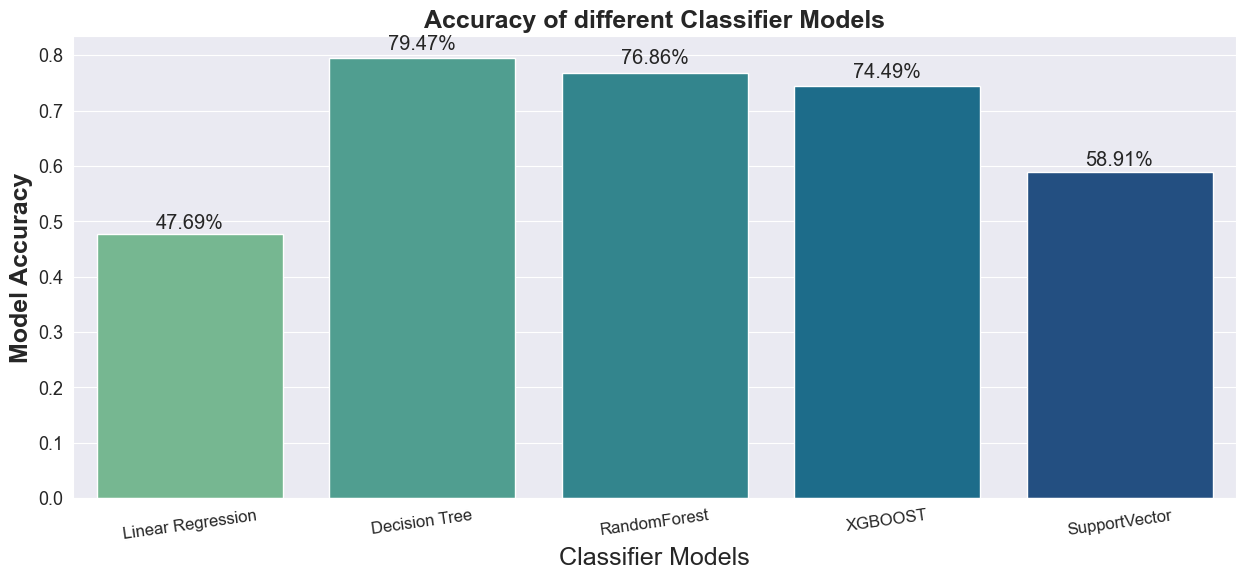

In [47]:
labels = ["Linear Regression", "Decision Tree", "RandomForest", "XGBOOST", "SupportVector"]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=labels, y=model_accuracy, palette = "crest", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18)
plt.ylabel("Model Accuracy", fontsize = 18, fontweight = "bold")
plt.title("Accuracy of different Classifier Models", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
#get the model accuracy percentage
for percent in ax.patches:
    width, height = percent.get_width(), percent.get_height()
    x, y = percent.get_xy()  
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

we will use weighted ensemble, using decision tree, linear and support vector 50% weight all together
while random forest and xgb will get 50% together

---

<a id=400></a>
<h4 style= 'Background:deeppink; color:white; border:0'><center>Q4 Weighted Ensemble Learning 🧠</center></h3>

> Weighted ensemble is a technique used in machine learning to combine the predictions of multiple models by assigning a weight to each model's prediction.
>
> * The weights are assigned based on the accuracy of each model's predictions on a validation set.
The more accurate a model is, the higher its weight will be.
> * The final prediction is then calculated by taking a weighted average of the predictions from all the models.
> * The advantage of weighted ensemble is that it can improve the overall accuracy of the predictions by reducing the impact of poorly performing models.

In [48]:
# define the ensemble model
ensemble = VotingRegressor(estimators=[('lr', lr), ('dt', dtr), ('rf', rfr), ('xgb', xgb), ('SVR', svr)],
                           weights=[1, 2, 3, 3, 1])

ensemble.fit(transformedX_train,y_train)

# fit the ensemble model
ensemble.fit(transformedX_train, y_train)

#Evaluate the models on the test set
ensemble_score = r2_score(y_test, ensemble.predict(transformedX_test))

# make predictions on the test set
y_pred = ensemble.predict(transformedX_test)

# append the accuracy for plotting comparison
model_accuracy.append(ensemble_score)

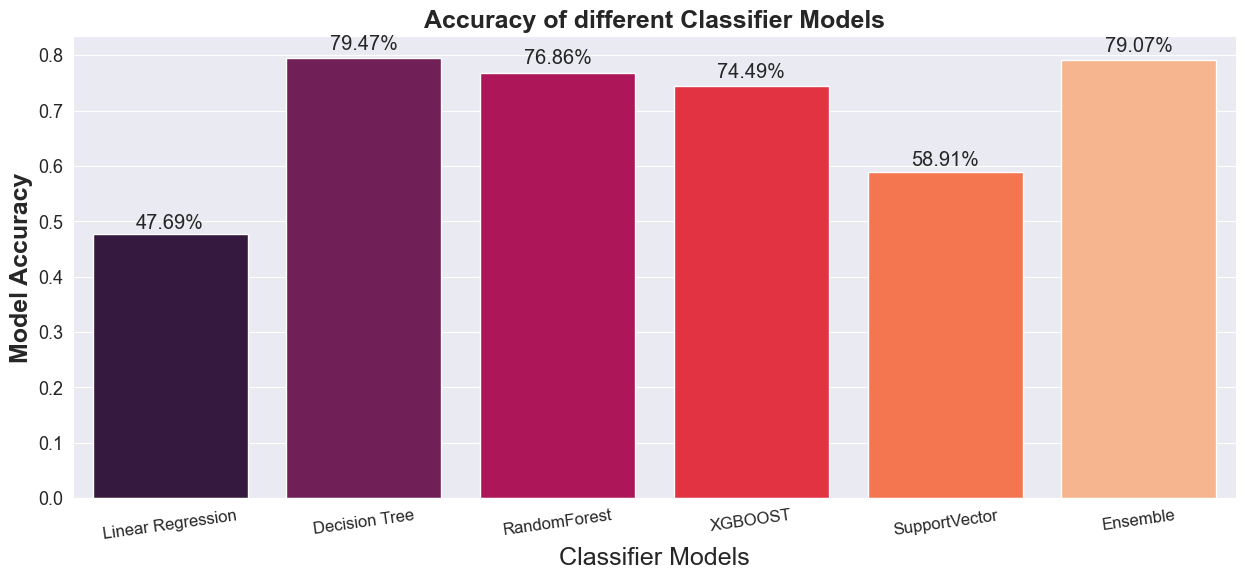

In [49]:
labels = ["Linear Regression", "Decision Tree", "RandomForest", "XGBOOST", "SupportVector",  "Ensemble"]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=labels, y=model_accuracy, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 18)
plt.ylabel("Model Accuracy", fontsize = 18, fontweight = "bold")
plt.title("Accuracy of different Classifier Models", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
#get the model accuracy percentage
for percent in ax.patches:
    width, height = percent.get_width(), percent.get_height()
    x, y = percent.get_xy()  
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [50]:
# list of selected features
selected_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# drop all columns except for selected ones
df = spotify[selected_features]

df.head(1)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
0,0.824755,0.625604,0.889092,0.038852,0.453265,0.000757,0.627395,0.298644,0.393282,0.75


In [51]:
# Make a prediction using the trained voting regressor
X_test = [[0.824755, 0.625604, 0.889092, 0.038852, 0.453265, 0.000757, 0.627395, 0.298644, 304524, 4]]
prediction = ensemble.predict(X_test)

# Print the predicted value
print("Predicted likeability is:", prediction)


Predicted likeability is: [0.2282964]


In [52]:
spotify['liked'].head(1)

0    0
Name: liked, dtype: int64

the song details of "Him & I" by G-Eazy and Halsey as provided by the Spotify API:

- Danceability: 0.679
- Energy: 0.661
- Loudness: -6.365 dB
- Speechiness: 0.0412
- Acousticness: 0.0777
- Instrumentalness: 0.0000331
- Valence: 0.485
- Tempo: 88.951 BPM
- Duration_ms: 284927 ms
- Time_signature: 4/4

In [54]:
# create a dictionary with the new row data
new_row = {'danceability': 0.679, 'energy': 0.729, 'loudness': -5.315, 'speechiness': 0.0525, 
           'acousticness': 0.0522, 'instrumentalness': 0, 'valence': 0.471, 'tempo': 88.951, 
           'duration_ms': 216840, 'time_signature': 4}

# create a new DataFrame with the new row
new_df = pd.DataFrame(new_row, index=[df.shape[0]])

# append the new DataFrame to the original DataFrame
df = df.append(new_df)


In [55]:
df.tail(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
193,0.544118,0.731280,0.912286,0.134127,0.040801,0.000004,0.399809,0.420273,0.195561,1.00
194,0.756127,0.667874,0.862016,0.330340,0.130651,0.000000,0.524717,0.144629,0.173025,0.75
195,0.679000,0.729000,-5.315000,0.052500,0.052200,0.000000,0.471000,88.951000,216840.000000,4.00


In [56]:
num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'time_signature']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [57]:
df.tail(1)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
195,0.679,0.729,0.0,0.0525,0.0522,0.0,0.471,1.0,1.0,1.0


In [58]:
# Make a prediction using the trained voting regressor
X_test = [[0.679, 0.729, 0.812, 0.0525, 0.0522, 0.0, 0.471, 1.0, 1.0, 1.0]]
prediction = ensemble.predict(X_test)

# Print the predicted value
print(f"Predicted likeability is: {round((prediction[0]*100),3)}%")

Predicted likeability is: 64.58%


well I guess he/she would like him&I :)